# Base de datos Pokemon: Patrones con K-means

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

df = pd.read_csv('Pokemon.csv')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [3]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


# Registros por categoría

In [4]:
print(df.groupby('Generation').size())

Generation
1    166
2    106
3    160
4    121
5    165
6     82
dtype: int64


# Análisis Gráfico

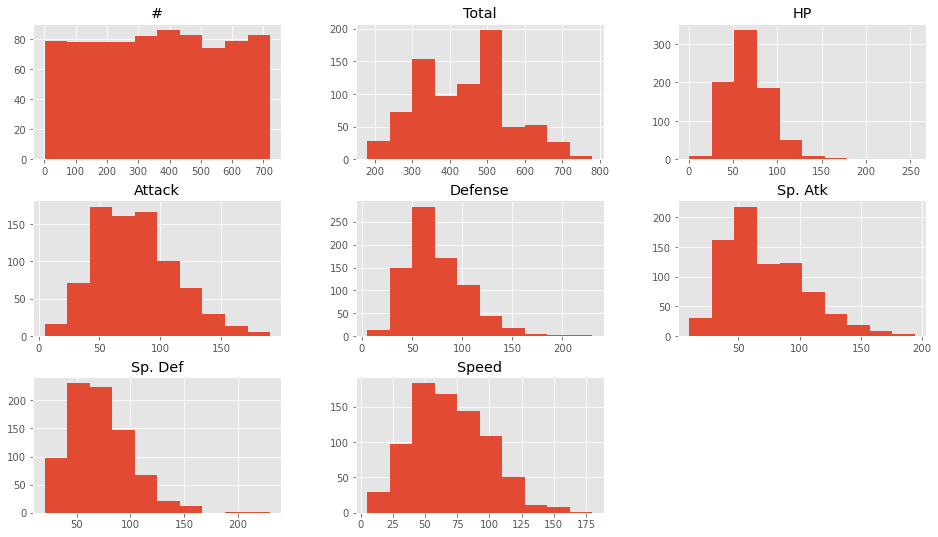

In [5]:
df.drop(['Generation'], axis='columns').hist()
plt.show()

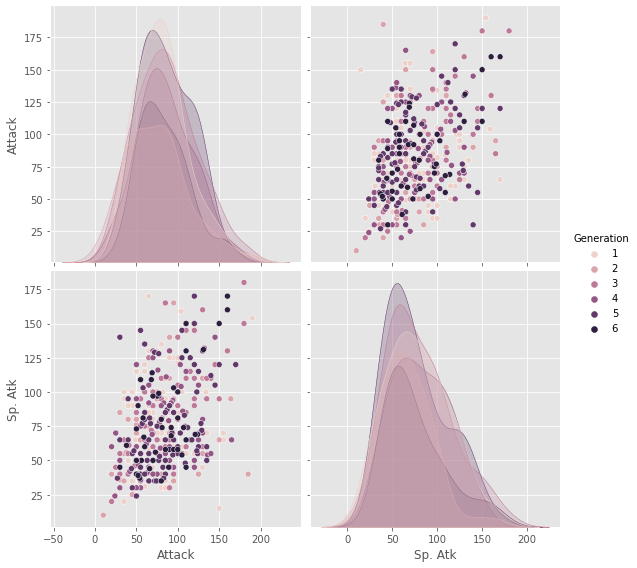

In [6]:
sb.pairplot(df.dropna(), hue='Generation', height=4, vars=["Attack","Sp. Atk"], kind='scatter')

# Extracción de métricas

In [7]:
X = np.array(df[['Attack', "Sp. Atk"]])
y = np.array(df['Generation'])
X.shape

(800, 2)

# Gráfica en 3D

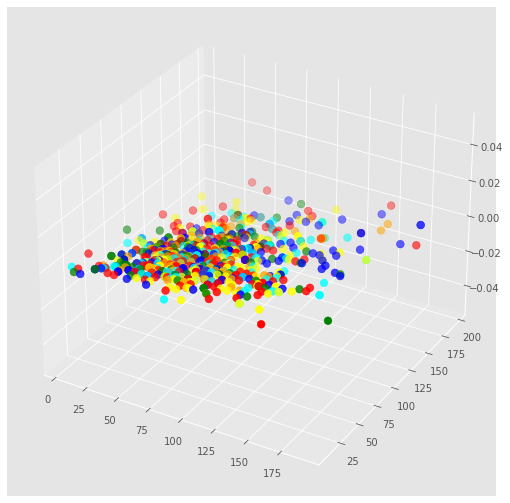

In [10]:
fig = plt.figure()
ax = plt.axes(projection='3d')
colors=['blue', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange', 'black', 'pink', 'brown', 'purple']
assign=[]
for row in y:
    assign.append(colors[row])
ax.scatter(X[:, 0], X[:, 1], c=assign, s=60)

# Hallar *K* empleando el algoritmo de "punto de codo".

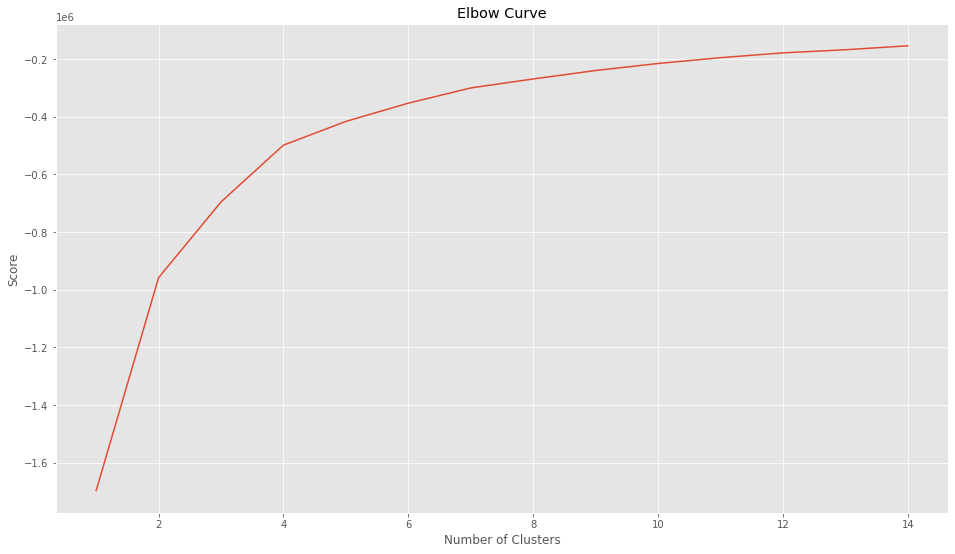

In [26]:
Nc = range(1, 15)
kmeans = [KMeans(n_clusters=i) for i in Nc]
#kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
#score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Tomaremos a 4 como buen valor para *K*. 

In [27]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 72.89958159  95.75732218]
 [127.7752809  127.1011236 ]
 [105.4973545   57.15873016]
 [ 51.12014134  46.83745583]]


# Gráfica 3D por grupos

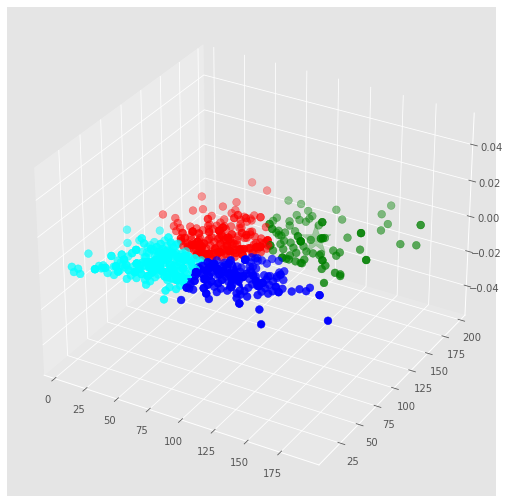

In [30]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colors=['red','green','blue','cyan']
assign=[]
for row in labels:
    assign.append(colors[row])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], c=assign,s=60)
ax.scatter(C[:, 0], C[:, 1], marker='*', c=colors, s=1000)

# Gráfica 2D por grupos

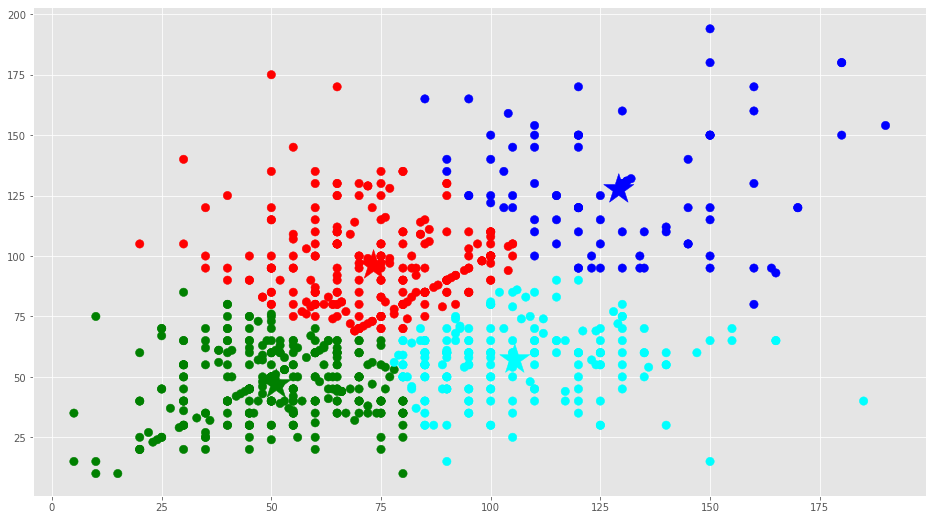

In [18]:
# Getting the values and plotting it
f1 = df['Attack'].values
f2 = df['Sp. Atk'].values

plt.scatter(f1, f2, c=assign, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colors, s=1000)
plt.show()

# Cantidad de Pokemon de cada grupo

In [19]:
copy =  pd.DataFrame()
copy['user']=df['Name'].values
copy['category']=df['Generation'].values
copy['label'] = labels;
amountByGroup =  pd.DataFrame()
amountByGroup['color']=colors
amountByGroup['amount']=copy.groupby('label').size()
amountByGroup

,color,amount
0,red,243
1,green,283
2,blue,85
3,cyan,189


#  Diversidad de generaciones que hay en cada grupo

In [28]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversityGroup =  pd.DataFrame()
diversityGroup['category']=[0,1,2,3,4,5,6]
diversityGroup['amount']=group_referrals.groupby('category').size()
diversityGroup

,category,amount
0,0,NaN
1,1,54.0
2,2,29.0
3,3,46.0
4,4,42.0
5,5,48.0
6,6,24.0
